<a href="https://colab.research.google.com/github/nikhil-xyz/Machine-Learning-Practice/blob/main/Time_Series_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata
kaggle_api_key = userdata.get('KAGGLE_API_KEY')

In [2]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "DailyDelhiClimateTrain.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sumanthvrao/daily-climate-time-series-data",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-2-1c2b62416608>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:          date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [3]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
data = df[['date', 'humidity']]

In [5]:
data.head()

,date,humidity
0,2013-01-01,84.500000
1,2013-01-02,92.000000
2,2013-01-03,87.000000
3,2013-01-04,71.333333
4,2013-01-05,86.833333


In [6]:
import pandas as pd
data.date = pd.to_datetime(data.date)

<ipython-input-6-9ffd12f01d43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.date = pd.to_datetime(data.date)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1462 non-null   datetime64[ns]
 1   humidity  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


In [8]:
data.set_index('date', inplace=True)

In [9]:
data.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

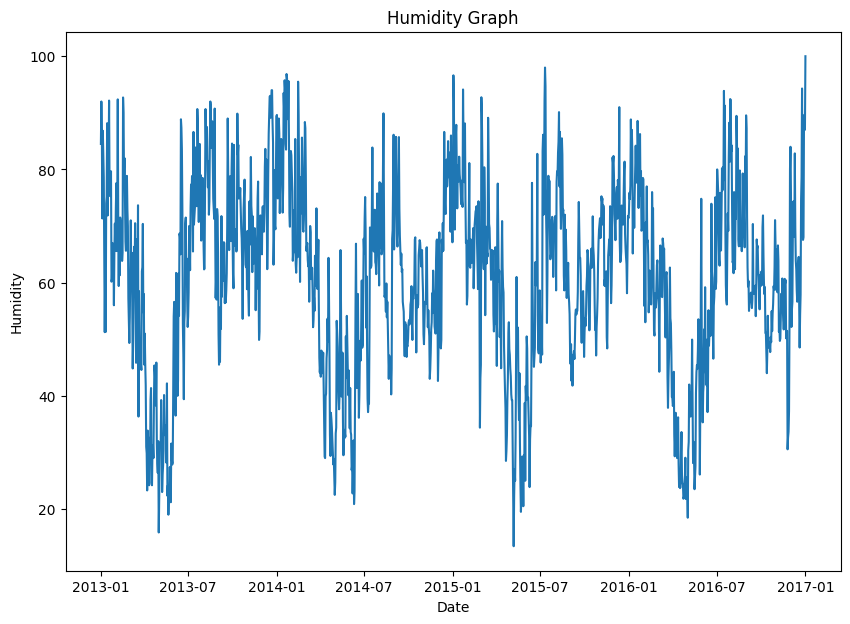

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(data.index, data.humidity)
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Humidity Graph')
plt.show()

### resampling

In [11]:
data = data.resample('M').mean()

<ipython-input-11-77f395f82e8d>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data = data.resample('M').mean()


In [12]:
data.head()

,humidity
date,
2013-01-31,73.028802
2013-02-28,71.938563
2013-03-31,57.417243
2013-04-30,34.612103
2013-05-31,28.938249


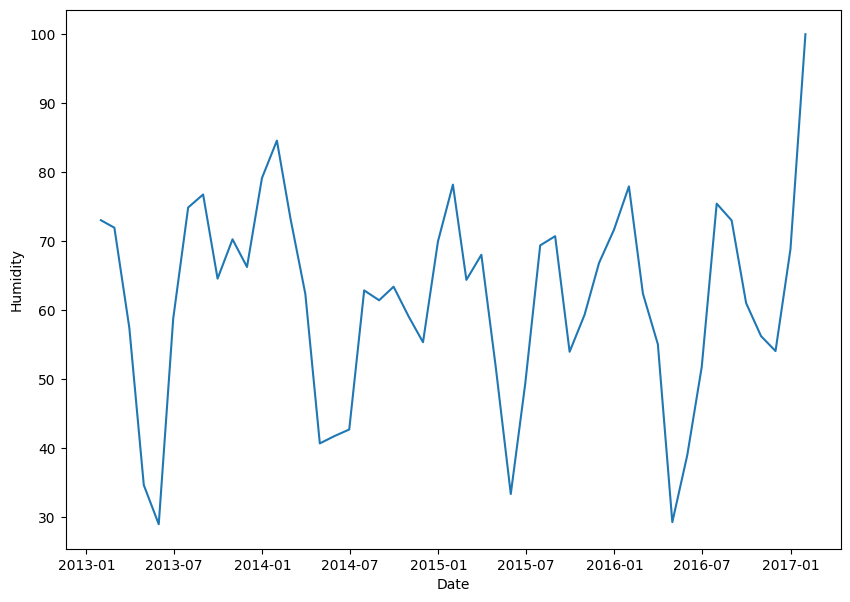

In [13]:
plt.figure(figsize=(10, 7))
plt.plot(data.index, data.humidity)
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.show()

seasonal_decomposition

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
from statsmodels.tsa.seasonal import STL

In [16]:
decompose = seasonal_decompose(data.humidity, model='multiplicative', period=12)

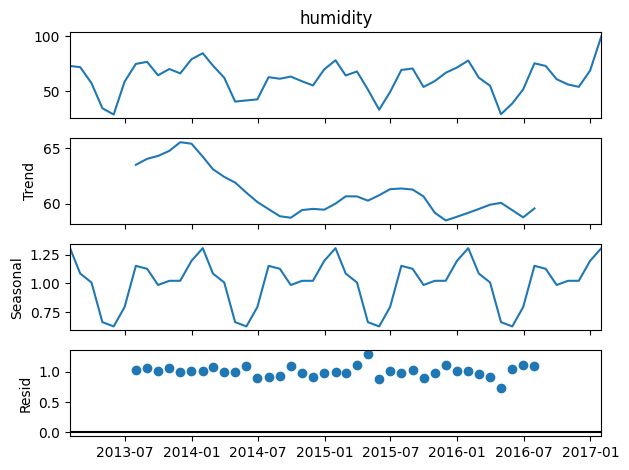

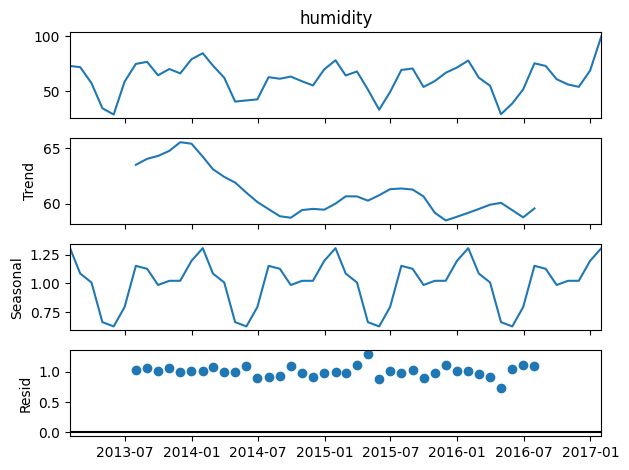

In [17]:
decompose.plot()

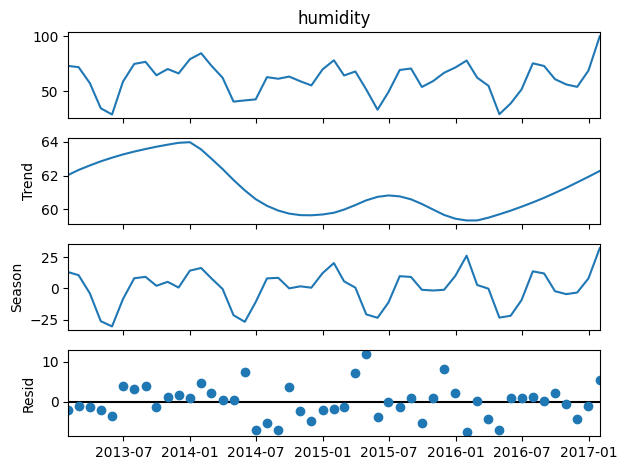

In [18]:
# writing a code for stl decomposition
from statsmodels.tsa.seasonal import STL
stl = STL(data.humidity, period=12)
res = stl.fit()
fig = res.plot()

stationarity

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
result = adfuller(data.dropna())

In [21]:
result

(np.float64(-5.020371101617524),
 np.float64(2.0222554449424128e-05),
 7,
 41,
 {'1%': np.float64(-3.60098336718852),
  '5%': np.float64(-2.9351348158036012),
  '10%': np.float64(-2.6059629803688282)},
 np.float64(275.64746229867774))

In [22]:
result[1] < 0.05

np.True_

In [23]:
diff_data = data.diff(12)

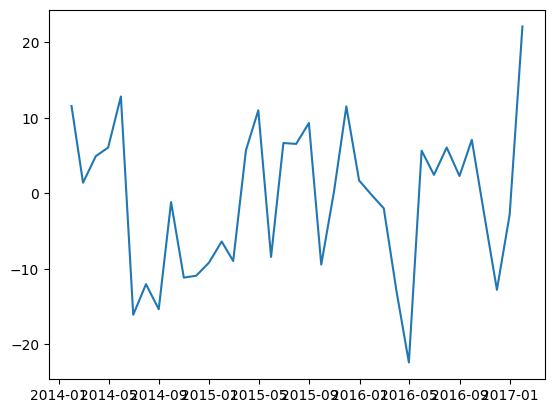

In [24]:
plt.plot(diff_data)

differencing

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

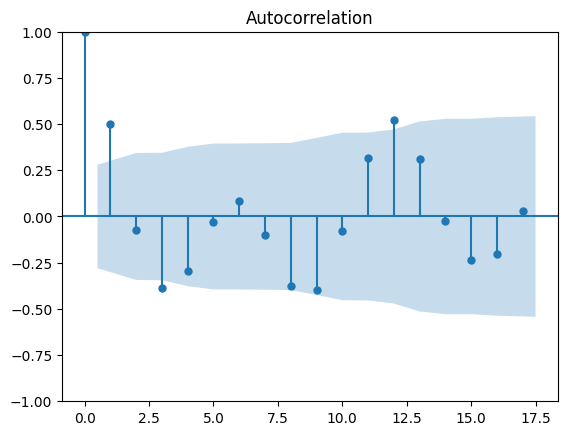

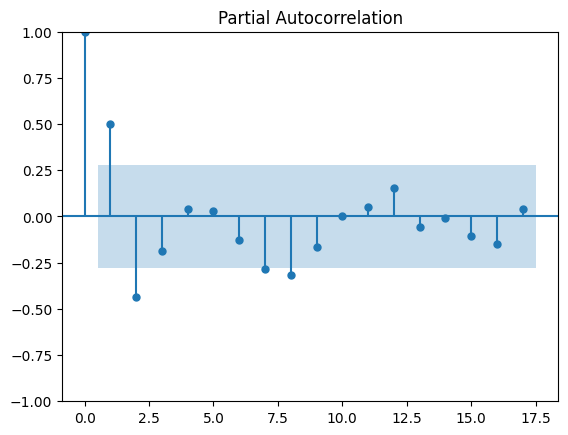

In [26]:
plot_acf(data.humidity)
plt.show()
plot_pacf(data.humidity)
plt.show()